# Procesamiento Digital de Imágenes en Python

En esta práctica se exploran distintas librerías de Python para el procesamiento digital de imágenes.  
Se aplican diversas técnicas sobre distintos tipos de datos: arreglos, imágenes obtenidas de internet, fotografías locales y secuencias de imágenes (video).

El objetivo es observar cómo diferentes transformaciones permiten modificar, resaltar o analizar información visual contenida en los datos.


In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance, ImageDraw


## 1. Tratamiento de un arreglo

En esta sección se trabaja directamente con un arreglo numérico que simula una imagen en escala de grises.  
Este ejercicio permite comprender cómo una imagen puede representarse como una matriz y cómo pequeñas operaciones matemáticas pueden alterar su apariencia.


(np.float64(-0.5), np.float64(99.5), np.float64(99.5), np.float64(-0.5))

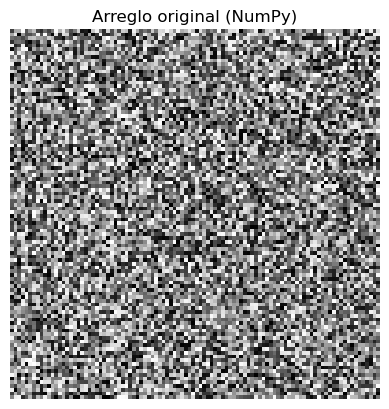

In [14]:
arr = np.random.randint(0, 256, (100, 100), dtype=np.uint8)

plt.imshow(arr, cmap="gray")
plt.title("Arreglo original (NumPy)")
plt.axis("off")


**Comentario:**  
Al modificar los valores del arreglo se observa cómo cambian las intensidades de la imagen, demostrando que las imágenes digitales son estructuras matemáticas manipulables.


(np.float64(-0.5), np.float64(99.5), np.float64(99.5), np.float64(-0.5))

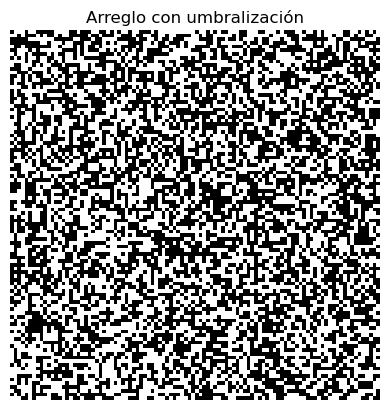

In [15]:
thresholded = arr > 128

plt.imshow(thresholded, cmap="gray")
plt.title("Arreglo con umbralización")
plt.axis("off")


## 2. Procesamiento de una imagen obtenida de internet

Se utiliza una imagen descargada previamente de internet para evitar problemas de acceso durante la ejecución del notebook. Sobre esta imagen se aplican técnicas básicas de procesamiento para analizar su contenido visual.


(np.float64(-0.5), np.float64(6015.5), np.float64(4015.5), np.float64(-0.5))

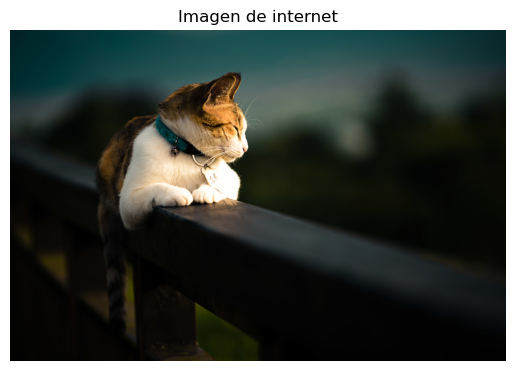

In [16]:
img = cv2.imread("Michi.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title("Imagen de internet")
plt.axis("off")


**Comentario:**  
Trabajar con imágenes externas permite probar las técnicas con datos reales y observar cómo responden a cambios de iluminación, color o textura.


(np.float64(-0.5), np.float64(6015.5), np.float64(4015.5), np.float64(-0.5))

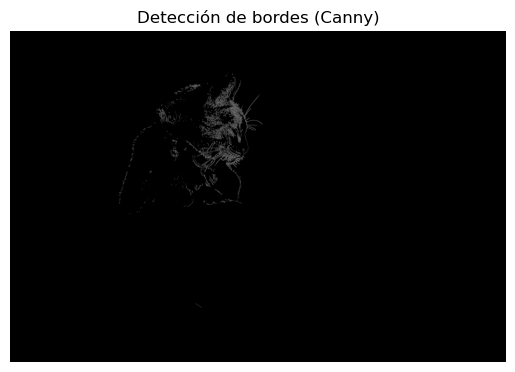

In [17]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray, 100, 200)

plt.imshow(edges, cmap="gray")
plt.title("Detección de bordes (Canny)")
plt.axis("off")


## 3. Procesamiento de una fotografía local

En este apartado se emplea una fotografía almacenada localmente. Este tipo de imágenes suele tener variaciones reales de luz y detalle, lo que las hace ideales para aplicar filtros y transformaciones más visibles.


(np.float64(-0.5), np.float64(1199.5), np.float64(1599.5), np.float64(-0.5))

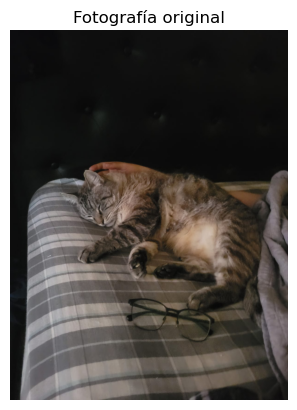

In [19]:
photo = Image.open("Nacho.jpeg")

plt.imshow(photo)
plt.title("Fotografía original")
plt.axis("off")


**Comentario:**  
Las fotografías reales presentan ruido y variaciones naturales, por lo que el efecto de las técnicas aplicadas se percibe de forma más clara que en imágenes sintéticas.


(np.float64(-0.5), np.float64(1199.5), np.float64(1599.5), np.float64(-0.5))

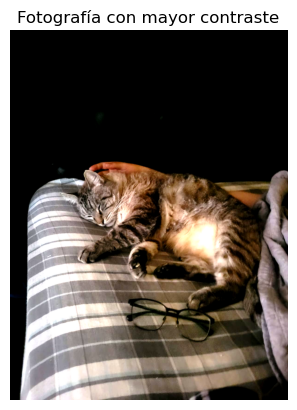

In [20]:
enhancer = ImageEnhance.Contrast(photo)
contrast_img = enhancer.enhance(2.0)

plt.imshow(contrast_img)
plt.title("Fotografía con mayor contraste")
plt.axis("off")


## 4. Generación de una imagen mediante dibujo digital

Se utiliza la librería Pillow para crear una imagen desde cero utilizando herramientas de dibujo. En este caso se genera un dibujo sencillo con formas básicas, demostrando que las imágenes no solo se procesan, sino que también pueden crearse mediante código.


(np.float64(-0.5), np.float64(299.5), np.float64(299.5), np.float64(-0.5))

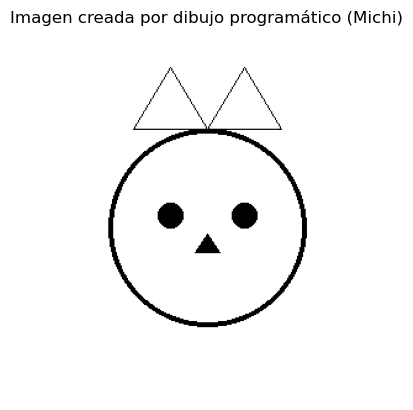

In [28]:
img = Image.new("RGB", (300, 300), "white")
draw = ImageDraw.Draw(img)

# Cara
draw.ellipse((70, 80, 230, 240), outline="black", width=4)

# Orejas
draw.polygon([(90,80),(120,30),(150,80)], outline="black")
draw.polygon([(150,80),(180,30),(210,80)], outline="black")

# Ojos
draw.ellipse((110,140,130,160), fill="black")
draw.ellipse((170,140,190,160), fill="black")

# Nariz
draw.polygon([(150,165),(140,180),(160,180)], fill="black")

plt.imshow(img)
plt.title("Imagen creada por dibujo programático (Michi)")
plt.axis("off")


## 5. Procesamiento de una secuencia de imágenes (video)

En esta sección se trabaja con una secuencia de imágenes obtenida de un video. El análisis se realiza comparando frames separados en el tiempo para identificar cambios visibles producidos por el movimiento y el efecto de zoom.


(np.float64(-0.5), np.float64(473.5), np.float64(849.5), np.float64(-0.5))

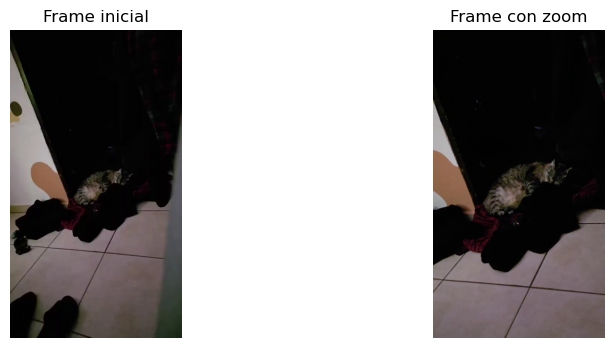

In [27]:
cap = cv2.VideoCapture("Video.mp4")

# Frame inicial
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
ret, frame_start = cap.read()

# Frame más adelante (ajusta este número si quieres)
cap.set(cv2.CAP_PROP_POS_FRAMES, 40)
ret, frame_later = cap.read()

cap.release()

# Convertir a RGB para mostrar
frame_start = cv2.cvtColor(frame_start, cv2.COLOR_BGR2RGB)
frame_later = cv2.cvtColor(frame_later, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(frame_start)
plt.title("Frame inicial")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(frame_later)
plt.title("Frame con zoom")
plt.axis("off")



**Comentario:**  
Al comparar frames distantes se logra visualizar claramente el cambio producido en la escena, lo cual no sería evidente al analizar frames consecutivos.


(np.float64(-0.5), np.float64(473.5), np.float64(849.5), np.float64(-0.5))

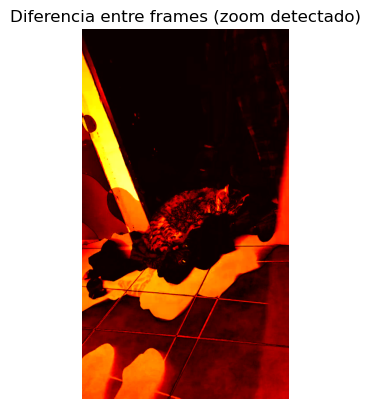

In [25]:
gray_start = cv2.cvtColor(frame_start, cv2.COLOR_RGB2GRAY)
gray_later = cv2.cvtColor(frame_later, cv2.COLOR_RGB2GRAY)

diff = cv2.absdiff(gray_start, gray_later)

plt.imshow(diff, cmap="hot")
plt.title("Diferencia entre frames (zoom detectado)")
plt.axis("off")


## Conclusión

Durante esta práctica se exploraron distintas librerías de Python para el procesamiento digital de imágenes, aplicando técnicas sobre arreglos, imágenes de internet, fotografías locales y secuencias de imágenes(video).

Las técnicas aplicadas muestran que el tipo de dato influye directamente en el resultado del procesamiento. La comparación de frames en el video resultó especialmente útil para detectar cambios producidos por el zoom, demostrando la importancia de seleccionar adecuadamente los datos a analizar.

Finalmente, esta práctica permitió comprender que el procesamiento digital de imágenes es una herramienta flexible que puede adaptarse a distintos tipos de datos y aplicaciones.
